In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [3]:
data =pd.read_csv('simulations_baseline.csv')
del data['Unnamed: 0']

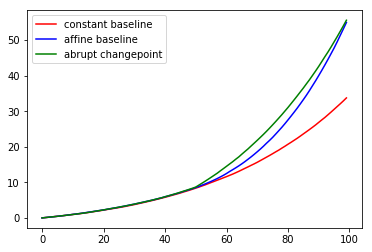

In [4]:
plt.plot(data['constant'].values,"r", label="constant baseline")
plt.plot(data['piecewise_affine'].values,"b", label="affine baseline")
plt.plot(data['abrupt'].values, "g" , label="abrupt changepoint")
plt.legend()
plt.show()

Estimation of $e(t) = m(t) + \psi \star m (t)$

In [5]:
data_raw_constant = pd.read_csv('constant.csv')

In [6]:
data_raw_constant['constant'].values

array([4.58518019e-05, 5.62703515e-05, 1.02367902e-04, ...,
       9.99976385e-01, 9.99984009e-01, 9.99993865e-01])

In [7]:
N_simul = 2000

In [8]:
data_raw_abrupt = pd.read_csv('abrupt.csv')

In [9]:
data_raw_abrupt['abrupt'].values

array([7.11387965e-05, 1.12714956e-04, 1.25533054e-04, ...,
       9.99990596e-01, 9.99994015e-01, 9.99998968e-01])

We perform a kernel estimation of $h(t) =  \mu(t) + \psi \star \mu (t)$

In [10]:
from scipy import stats

In [11]:
kernel = stats.gaussian_kde(data_raw_constant['constant'].values)

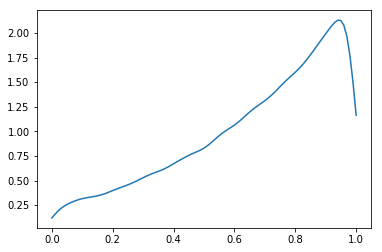

In [12]:
plt.plot(np.linspace(0,1,100),kernel(np.linspace(0,1,100)))
plt.show()

In [13]:
kernel_abrupt = stats.gaussian_kde(data_raw_abrupt['abrupt'].values)

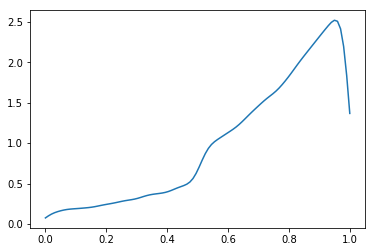

In [14]:
plt.plot(np.linspace(0,1,100),kernel_abrupt(np.linspace(0,1,100)))
plt.show()

In [15]:
from scipy.stats import norm

In [21]:
def kernel_estim(points,dates,n,bandwidth):
    krn = lambda t : np.sum(norm.pdf(t-dates, loc=0, scale=bandwidth))
    return np.array([krn(u)/n for u in points])
    

In [41]:
Z=kernel_estim(np.linspace(0,1,100),data_raw_constant['constant'].values,N_simul,0.015)

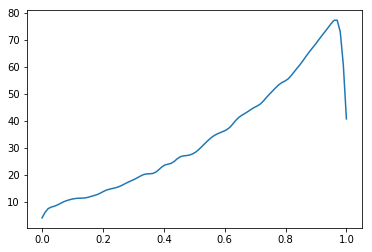

In [42]:
plt.plot(np.linspace(0,1,100),Z)
plt.show()

In [65]:
Z

array([ 4.10035344,  6.19937288,  7.54473205,  8.11494053,  8.43641106,
        8.89391618,  9.48901721, 10.05204334, 10.49615728, 10.8412183 ,
       11.11194824, 11.30305808, 11.39328094, 11.415639  , 11.49911316,
       11.73837009, 12.07545881, 12.40599018, 12.76741772, 13.28500612,
       13.90568061, 14.41568083, 14.75005611, 15.01188096, 15.28676543,
       15.65308723, 16.16557132, 16.75822055, 17.32551053, 17.84286423,
       18.35599546, 18.93727371, 19.58524521, 20.12533915, 20.377674  ,
       20.41748675, 20.54293073, 21.04238593, 21.95952242, 22.98948143,
       23.70048893, 23.99327696, 24.28944733, 25.01365043, 25.99555876,
       26.74241792, 27.06465028, 27.16791888, 27.36213162, 27.79838496,
       28.47802944, 29.41386207, 30.53482657, 31.66890371, 32.75899854,
       33.77191161, 34.58389544, 35.18182037, 35.6749755 , 36.13719577,
       36.67996617, 37.52336319, 38.77467788, 40.1647726 , 41.29003653,
       42.08129234, 42.75568813, 43.4791082 , 44.24857079, 44.94

In [43]:
Z_a=kernel_estim(np.linspace(0,1,100),data_raw_abrupt['abrupt'].values,N_simul,0.015)

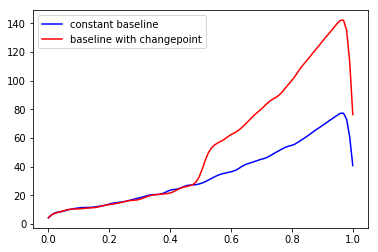

In [61]:
plt.plot(np.linspace(0,1,100),Z,"b",label="constant baseline")
plt.plot(np.linspace(0,1,100),Z_a,"r", label="baseline with changepoint")
plt.legend()
plt.show()

$\mu_0 =8$ and $\mu_1 = 29$ 

In [48]:
Z[48],Z_a[48]

(27.36213162131637, 29.193568231276895)

In [50]:
Z[57],Z_a[57]

(35.18182037103179, 58.74234614012782)

The estimated jump is of order $\mu_1 - \mu_0$, which is the theoretical value for the magnitude of change.

For the market data

In [54]:
market_ticks = pd.read_csv("ticks_0_1.csv")

In [57]:
ticks_N = market_ticks['ticks'].values

In [58]:
Z_data=kernel_estim(np.linspace(0,1,100),ticks_N,30,0.015)

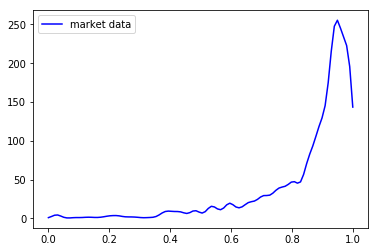

In [62]:
plt.plot(np.linspace(0,1,100),Z_data,"b",label="market data")
plt.legend()
plt.show()

Some graphical evidence for a non-constant baseline approach (but a side-effect in 1 due to the kernel estimator).

In [63]:
Z_data

array([  0.89095381,   2.3661737 ,   4.00214882,   4.31156588,
         2.96330868,   1.33197469,   0.53014335,   0.52816931,
         0.82391016,   0.98206481,   0.97314875,   1.07195202,
         1.30705684,   1.43806121,   1.34108779,   1.14495614,
         1.13041861,   1.43583264,   2.00706926,   2.70842204,
         3.253993  ,   3.51973541,   3.56293429,   3.18896168,
         2.46915996,   1.95860063,   1.8277274 ,   1.78657349,
         1.63788128,   1.34016903,   0.9741489 ,   0.79346766,
         0.9008336 ,   1.07687835,   1.35319274,   2.31918377,
         4.37378391,   6.93886526,   8.79156022,   9.31550914,
         9.0533323 ,   8.81242049,   8.76247087,   8.32823098,
         7.12361873,   6.28839258,   7.35271159,   9.39826639,
         9.79092074,   8.05523501,   6.78898672,   8.59246857,
        12.7549463 ,  15.50433778,  14.64744171,  12.11926338,
        11.10724305,  13.28624981,  17.42130326,  19.50628418,
        17.6006722 ,  14.61171702,  13.55921038,  14.81

In [64]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR

/home/benjamin/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [66]:
data.s = pd.Series(Z[1:95])

/home/benjamin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [70]:
data.s

0      6.199373
1      7.544732
2      8.114941
3      8.436411
4      8.893916
5      9.489017
6     10.052043
7     10.496157
8     10.841218
9     11.111948
10    11.303058
11    11.393281
12    11.415639
13    11.499113
14    11.738370
15    12.075459
16    12.405990
17    12.767418
18    13.285006
19    13.905681
20    14.415681
21    14.750056
22    15.011881
23    15.286765
24    15.653087
25    16.165571
26    16.758221
27    17.325511
28    17.842864
29    18.355995
        ...    
64    42.081292
65    42.755688
66    43.479108
67    44.248571
68    44.943250
69    45.517295
70    46.235808
71    47.352822
72    48.674737
73    49.911821
74    51.075112
75    52.259299
76    53.357510
77    54.158328
78    54.729683
79    55.491108
80    56.696960
81    58.139977
82    59.547213
83    60.941688
84    62.471569
85    64.099569
86    65.644209
87    67.051022
88    68.471323
89    69.997431
90    71.509862
91    72.954011
92    74.423576
93    75.932461
Length: 94, dtype: float

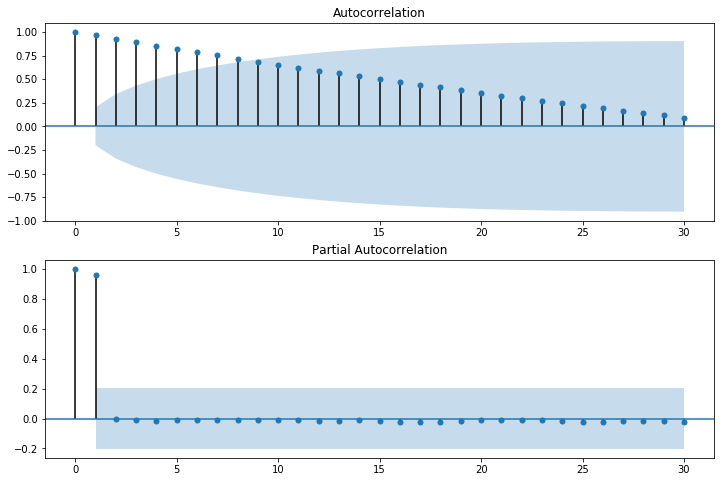

In [71]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.s, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.s, lags=30, ax=ax2)

In [92]:
p = 2
X = Z[1:95]
q = len(X)

In [93]:
Y = np.transpose(np.matrix(X[p:]))

In [94]:
design_t = np.matrix([np.ones(q-p)])

In [95]:
for i in range(1,p+1):
    design_t = np.concatenate((design_t, np.matrix(X[(p-i):(q-i)])), axis=0)

In [96]:
design_t.shape

(3, 92)

In [97]:
design = np.transpose(design_t)

In [98]:
A =np.dot(design_t, design)

In [99]:
np.linalg.svd(A)

(matrix([[-0.01652423,  0.99047059,  0.13672951],
         [-0.71472184,  0.08392836, -0.69435489],
         [-0.69921359, -0.10919724,  0.70652411]]),
 array([2.50852377e+05, 2.38964296e+01, 3.29307002e+00]),
 matrix([[-0.01652423, -0.71472184, -0.69921359],
         [ 0.99047059,  0.08392836, -0.10919724],
         [ 0.13672951, -0.69435489,  0.70652411]]))

In [100]:
np.dot(np.linalg.inv(A),np.dot(design_t,Y))

matrix([[ 0.02917823],
        [ 1.65171254],
        [-0.64437821]])

In [81]:
Z

array([ 4.10035344,  6.19937288,  7.54473205,  8.11494053,  8.43641106,
        8.89391618,  9.48901721, 10.05204334, 10.49615728, 10.8412183 ,
       11.11194824, 11.30305808, 11.39328094, 11.415639  , 11.49911316,
       11.73837009, 12.07545881, 12.40599018, 12.76741772, 13.28500612,
       13.90568061, 14.41568083, 14.75005611, 15.01188096, 15.28676543,
       15.65308723, 16.16557132, 16.75822055, 17.32551053, 17.84286423,
       18.35599546, 18.93727371, 19.58524521, 20.12533915, 20.377674  ,
       20.41748675, 20.54293073, 21.04238593, 21.95952242, 22.98948143,
       23.70048893, 23.99327696, 24.28944733, 25.01365043, 25.99555876,
       26.74241792, 27.06465028, 27.16791888, 27.36213162, 27.79838496,
       28.47802944, 29.41386207, 30.53482657, 31.66890371, 32.75899854,
       33.77191161, 34.58389544, 35.18182037, 35.6749755 , 36.13719577,
       36.67996617, 37.52336319, 38.77467788, 40.1647726 , 41.29003653,
       42.08129234, 42.75568813, 43.4791082 , 44.24857079, 44.94

In [82]:
Z_data

array([  0.89095381,   2.3661737 ,   4.00214882,   4.31156588,
         2.96330868,   1.33197469,   0.53014335,   0.52816931,
         0.82391016,   0.98206481,   0.97314875,   1.07195202,
         1.30705684,   1.43806121,   1.34108779,   1.14495614,
         1.13041861,   1.43583264,   2.00706926,   2.70842204,
         3.253993  ,   3.51973541,   3.56293429,   3.18896168,
         2.46915996,   1.95860063,   1.8277274 ,   1.78657349,
         1.63788128,   1.34016903,   0.9741489 ,   0.79346766,
         0.9008336 ,   1.07687835,   1.35319274,   2.31918377,
         4.37378391,   6.93886526,   8.79156022,   9.31550914,
         9.0533323 ,   8.81242049,   8.76247087,   8.32823098,
         7.12361873,   6.28839258,   7.35271159,   9.39826639,
         9.79092074,   8.05523501,   6.78898672,   8.59246857,
        12.7549463 ,  15.50433778,  14.64744171,  12.11926338,
        11.10724305,  13.28624981,  17.42130326,  19.50628418,
        17.6006722 ,  14.61171702,  13.55921038,  14.81